# **1. 로지스틱 회귀**


1.   이름은 회귀이지만 분류(Classification) 작업에 사용
2.   선형 회귀 시 가설(hypothesis) $H(x) = Wx + b$ 을 시그모이드 함수에 대입하여 사용하면 아래와 같은 그래프 
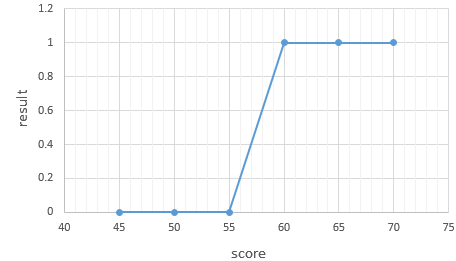
3. 로지스틱 회귀의 가설 $H(x) = sigmoid(Wx + b) = 1/{1 + e^{-(Wx + b)}} = σ(Wx + b)
$

# 1-1 시그모이드 함수

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

***W와 Sigmoid Function***


W(가중치)는 시그모이드 그래프의 경사도를 결정함 


(빨간선은 W가 0.5, 파란선은 W가 2.0)

In [6]:
# 시그모이드 함수 정의
def sigmoid(x): 
    return 1/(1+np.exp(-x))

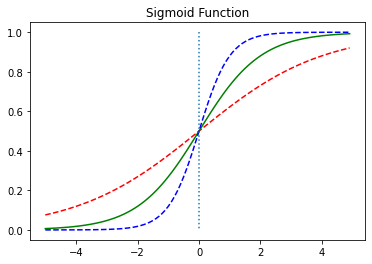

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

***b와 Sigmoid Fuction***

b(편차)에 따라 sigmoid graph는 좌우로 이동함

(빨간선은 +0.5, 초록선은 +1.0, 파란선은 +1.5)

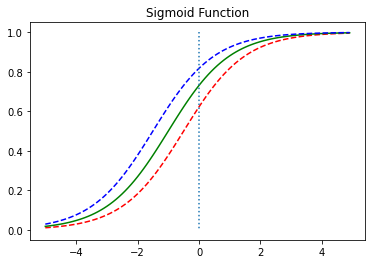

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# 1-2 비용 함수

 시그모이드 함수를 사용한다면 출력값, 즉 H(x) = sigmoid(Wx + b)는 0 ~ 1에 위치하게 된다. 이를 만약 선형 회귀처럼 MSE를 비용 함수로 사용하고 미분한다면 아래와 같은 그래프가 나온다. 이러한 그래프가 나온다면 로컬 미니멈과 글로벌 미니멈이 생겨서 비용 함수를 최소화하는 W(가중치)를 찾기 어려워진다.

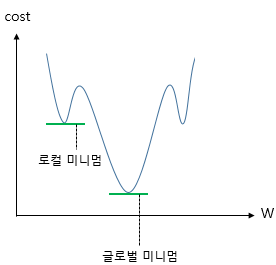



그렇기때문에 이는 선형 회귀와는 다른 방법으로 비용 함수가 최소가 되는 W를 찾아야 한다. 시그모이드 함수의 특징은 출력값이 0과 1사이에 존재한다는 것이다. 만약 정답이 1인데 예측값이 0이라면 비용 함수는 매우 커야한다. 이러한 조건을 만족시키는 함수(그래프)는 로그 함수이다. 아래의 그래프는 y = 0.5에 대칭하는 두 개의 로그 함수이다. 실제값(정답)이 1인 경우 주황색 선, 0인 경우는 초록색 선으로 표현되어있다. 

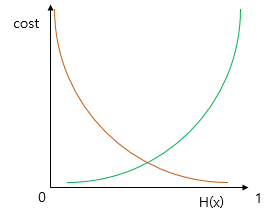

실제값이 1일 때,

 H(x)가 1이라면 비용 함수는 0이 되어야 한다. 반대로 H(x)가 0이라면 비용 함수는 무한대로 발산한다. 이를 식으로 표현하면 아래와 같다. 실제값이 0이라면 반대로 이해하면 된다.

 
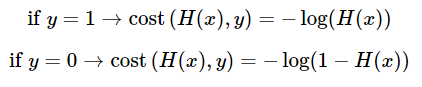

첫번째 식(-log(H(x)))은 주황색 그래프를 의미하고 두번째 식(-log(1-H(x)))은 초록색 그래프를 의미한다. 
 

그러므로 위 식을 사용해 비용 함수를 계산하는 식을 만든다면 아래와 같은 식이 만들어진다. 

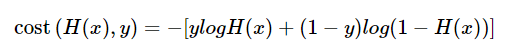

만약 실제값이 1인경우 y = 1이므로 우측 식은 삭제된다. 반대로 y = 0 인경우 좌측 식은 삭제된다. 이후 선형 회귀와 마찬가지로 모든 오차의 평균을 구하고 손실 함수가 최소가 되는 W를 찾기 위해 경사하강법을 수행한다.

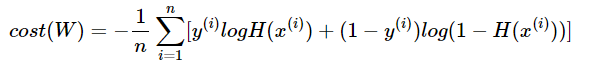

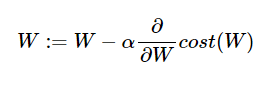

# 1-3 로지스틱 회귀 구현


*   feature가 2개인 다중 로지스틱 회귀 구현
*   비용 함수를 구하는 과정을 수식으로 표현



In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F # 비용함수를 계산할 때 사용
import torch.optim as optim

In [4]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data) # (6, 2) -> W는 2개가 있어야 함 -> W.Size = (2, 1)
y_train = torch.FloatTensor(y_data) # (6, 1)

In [5]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [15]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b))) 

print(hypothesis) # W가 0일 때의 예측값

print(y_train) #실제값

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])



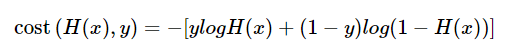

In [12]:
-(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1 - hypothesis[0])) # 위의 식을 통해 비용함수 계산

tensor([0.6931], grad_fn=<NegBackward0>)

In [16]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))

print(losses)

print(losses.mean())

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [17]:
F.binary_cross_entropy(hypothesis, y_train) # 이를 사용하면 자동으로 비용함수가 계산됨

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

모델의 훈련 과정을 포함한 코드

In [18]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [19]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
